In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.4):
            print("\nloss is low so cancel training")
            self.model.stop_training = True

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 23

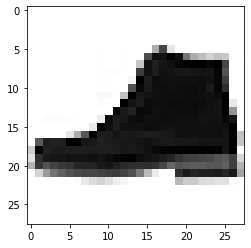

In [5]:
plt.imshow(train_images[42],cmap=plt.cm.binary)
print(train_images[42])

In [6]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)), # conv
    keras.layers.MaxPooling2D(2,2), # pool
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(), # flat to 1D
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax') # probability output
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [8]:
callbacks = myCallback()
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.4104 - accuracy: 0.8507
Epoch 2/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.2739 - accuracy: 0.8970
loss is low so cancel training
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.2738 - accuracy: 0.8970


In [9]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 6s 551us/sample - loss: 0.2734 - accuracy: 0.8981


[0.27341010315418246, 0.8981]

In [10]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[3.2417276e-07 6.9983827e-08 5.1203799e-08 3.5996017e-08 4.6106452e-09
 3.4608814e-04 3.3883431e-08 1.0515481e-03 2.1490072e-07 9.9860162e-01]
9


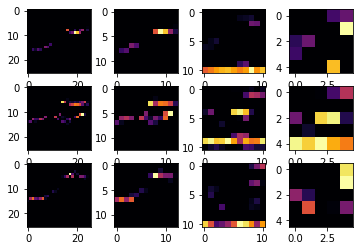

In [11]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1 # conv kernel 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4): # 4 layers: 2conv&2pool
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)